# Single Layer Perceptron

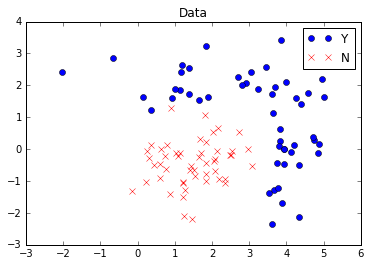

In [6]:
%matplotlib inline

import numpy as np
from numpy import random
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cm 

# Generate 2D data
N = 100

random.seed(5)

Yes = np.zeros([N/2, 2])
Yes1 = np.random.multivariate_normal([4, 0], [[0.3, 0], [0, 2]], N/4)
Yes2 = np.random.multivariate_normal([2, 2], [[2, 0], [0, 0.3]], N/4)
Yes[:N/4, :] = Yes1
Yes[N/4:, :] = Yes2

No = np.random.multivariate_normal([1.5, -0.5], [[0.5, 0], [0, 0.5]], N/2)

x = np.zeros([Yes.shape[0] + No.shape[0], 2])
x[:N/2, :2] = Yes
x[N/2:, :2] = No

y = np.append(np.ones(Yes.shape[0]),np.zeros(No.shape[0]))




def plot_bi_data(x, y, title = u'',
                       markers = [u'x', u'o'], 
                       colors = ['r', 'b'], 
                       labels = [u'N', u'Y'],
                       ax = None):
    idx = [0, 0]
    for i in range(2):
        idx[i] = (np.where(y==i)[0])
    
    if (ax == None):
        ax = plt.figure().add_subplot(111)
        
    for i in (1, 0):
        ax.plot(x[idx[i],0], x[idx[i],1], markers[i], 
                                          color=colors[i], 
                                          label= labels[i]) 
    ax.set_title(title)
    ax.legend()
    
    return ax
    
plot_bi_data(x, y, title='Data')



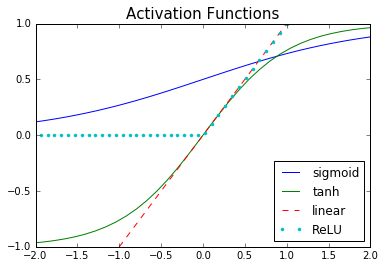

In [7]:
%matplotlib inline

import numpy as np
from numpy import random
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cm 


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))

def lin(x):
    return x

def ReLU(x):
    return np.maximum(0, x)

xx = np.linspace(-3, 3)
xx1 = np.linspace(-1, 1)
xx2 = np.linspace(-3, 1)

ax = plt.figure().add_subplot(111)
ax.plot(xx, sigmoid(xx), label='sigmoid')
ax.plot(xx, tanh(xx), label='tanh')
ax.plot(xx1, lin(xx1), '--', label='linear')
ax.plot(xx2, ReLU(xx2), '.', label='ReLU')
ax.axis([-2, 2, -1, 1])
#ax.axis('equal')
ax.legend(loc=4)
ax.set_title(u'Activation Functions', fontsize=15)
plt.show()

In [25]:
def plot_DecisionBoundary(x, clf, opt):
    x0_min, x0_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    h = 0.05
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                         np.arange(x1_min, x1_max, h))
    
    yy = clf(np.c_[xx0.ravel(), xx1.ravel()], opt)
    yy = yy.reshape(xx0.shape)
    
    ax = plt.figure().add_subplot(111)
    ax.contourf(xx0, xx1, yy, cmap=cmap)
    
    return ax

def plot_GD(x, y, clf, opt):
    ax = plot_DecisionBoundary(x, clf, opt)
    ax = plot_bi_data(x, y, ax=ax)
    
    return ax

In [26]:
def grad_sigmoid(x, o = None):
    if o == None:
        o = sigmoid(x)
        
    return np.multiply(o, (1 - o))

def grad_tanh(x, o = None):
    if o == None:
        o = sigmoid(x)
        
    return np.multiply(o, (1 - o))

def grad_lin(x, o = None):
    return 1

def grad_ReLU(x, o = None):
    return x >= 0

In [47]:
def evaluate(x, w, actFn, nargout=1):
    X = np.hstack((np.ones([x.shape[0], 1]), x))
    a = np.dot(X, w)
    o = actFn(a)
    if nargout == 1:
        return o
    elif nargout == 2:
        return o, a
    else:
        raise ValueError, "Invalid nargout!"

def classify(x, opt = {'w':np.array([0, 1, 1]), 'actFn':sigmoid}, classes=[-1, 1]):
    o = evaluate(x, opt['w'], opt['actFn'])
    
    c = np.ones_like(o) * classes[1]
    
    actFn = opt['actFn']
    
    if actFn is sigmoid:
        c[o < 0.5] = classes[0]
    else:
        c[o < 0] = classes[0]
    return c

def lossFn(x, y, w, actFn):
    o = evaluate(x, w, actFn)
    e = y - o
    return 0.5 * np.power(e, 2)

def grad(x, y, w, actFn, gradFn):
    o = evaluate(x, w, actFn)
    e = y - o
    g = gradFn(x)

def learn(x, y, epoch, mu, actFn=sigmoid, gradFn=grad_sigmoid, M=1, initW = 0.1):
    D = x.shape[1]
    
    w = random.randn(D + 1, M) * initW
    
    for i in range(epoch):
        dE_dw = grad(x, y, w, actFn, gradFn)
        
        if (i % (epoch / 10) == 0):
            E = lossFn(x, y, w, actFn)
            plot_GD(x, y, classify, opt={'w':w, 'actFn':actFn})
            
        w -= mu * dE_dw
    
    return w






In [48]:
classify(x)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.])

In [51]:
o, a = evaluate(x, np.array([0, 1, 1]), sigmoid)
print o

ValueError: too many values to unpack

In [22]:
x.shape

(100, 2)

In [78]:
np.power(sigmoid(a) - y, 2)


array([ 0.32031571,  0.43042752,  0.33297512,  0.24887415,  0.30710376,
        0.24101329,  0.29336149,  0.21318694,  0.39419657,  0.23801563,
        0.24183034,  0.25303109,  0.36684022,  0.29997195,  0.30104694,
        0.33418733,  0.30063455,  0.30363846,  0.33372889,  0.32224084,
        0.27979099,  0.31321367,  0.33688462,  0.37110253,  0.28389114,
        0.38278317,  0.25520122,  0.31944312,  0.36183659,  0.34889878,
        0.32152105,  0.29329545,  0.34289117,  0.36701553,  0.22645474,
        0.27592769,  0.38627529,  0.24755196,  0.35105066,  0.2907259 ,
        0.41436417,  0.36634962,  0.3839446 ,  0.28691644,  0.27539414,
        0.35598537,  0.30225985,  0.31143645,  0.29201222,  0.34997149,
        0.26257717,  0.30004696,  0.24776614,  0.23691934,  0.2873781 ,
        0.2931758 ,  0.27317371,  0.35953772,  0.22063994,  0.31134124,
        0.24024044,  0.32584438,  0.33670907,  0.34778603,  0.30726985,
        0.30904868,  0.31051948,  0.22589215,  0.22694881,  0.23